In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('mcdonalds.csv')

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
df.isnull().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [ ]:
df.isna().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
#check for number of unique values
df.nunique()

,0
yummy,2
convenient,2
spicy,2
fattening,2
greasy,2
fast,2
cheap,2
tasty,2
expensive,2
healthy,2


In [ ]:
# unique values in the columns
print(df['yummy'].unique())
print(df['convenient'].unique())
print(df['spicy'].unique())
print(df['Like'].unique())
print(df['healthy'].unique())
print(df['disgusting'].unique())
print(df['VisitFrequency'].unique())

['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
['No' 'Yes']
['No' 'Yes']
['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']


In [ ]:
#convert the binary output yes no into 1 and  0
bin_cols = ['yummy', 'convenient', 'spicy','fattening','greasy', 'fast','cheap','tasty','expensive', 'healthy', 'disgusting']
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [ ]:
# 'like' column need to be converted into numerical type

# step1 convert the str into numerical

df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'}).astype(float)


In [ ]:
# encode remaining col Gender and visitfrequency
categorial_cols = ['VisitFrequency', 'Gender']
df_encoded = pd.get_dummies(df, columns=categorial_cols, drop_first=True, dtype=int)

In [ ]:
df_encoded

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Male
0,0,1,0,1,0,1,1,0,1,0,0,-3.0,61,0,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2.0,51,0,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1.0,62,0,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4.0,69,0,0,0,1,0,0
4,0,1,0,1,1,1,1,0,0,1,0,2.0,49,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5.0,47,0,0,0,0,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,2.0,36,0,0,0,1,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,3.0,52,0,0,1,0,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,4.0,41,0,0,0,0,0,1


In [ ]:
#features for clustering
features_for_clustering = bin_cols +['Like','Age']
features_for_clustering.extend([col for col in df_encoded.columns if col.startswith('VisitFrequency_') or col.startswith('Gender_')])

In [ ]:
x = df_encoded[features_for_clustering]

In [ ]:
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Male
0,0,1,0,1,0,1,1,0,1,0,0,-3.0,61,0,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2.0,51,0,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1.0,62,0,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4.0,69,0,0,0,1,0,0
4,0,1,0,1,1,1,1,0,0,1,0,2.0,49,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5.0,47,0,0,0,0,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,2.0,36,0,0,0,1,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,3.0,52,0,0,1,0,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,4.0,41,0,0,0,0,0,1


In [ ]:
#scale the feature
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Principal Component Analysis PCA

In [ ]:
# Principal Component Analysis PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)


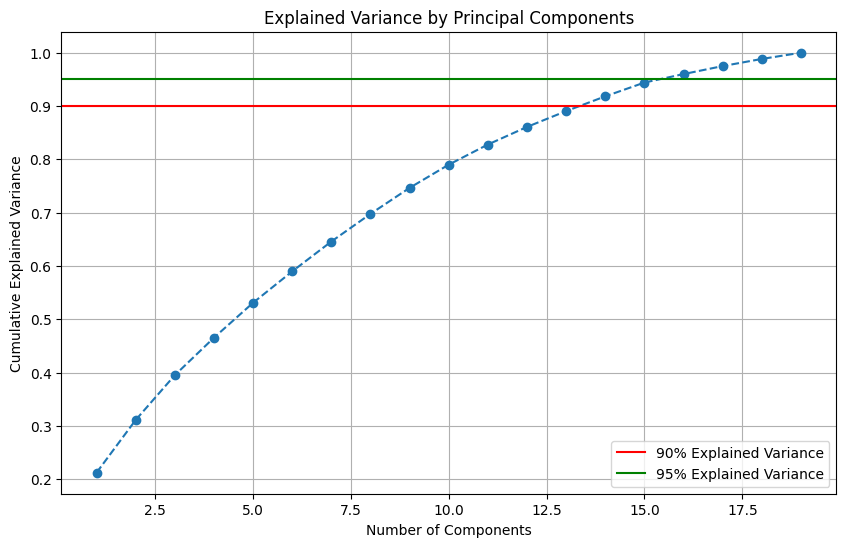

In [ ]:
# plotting explained varinace to decide number of comonents
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='-', label='95% Explained Variance')
plt.legend()
plt.show()

In [ ]:
# Decide the number of components
# number of components that explain at leat 90% variance.
num_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.90) + 1
print(f' number of components expalin at leat 90% varinace {num_components}')

 number of components expalin at leat 90% varinace 14


In [ ]:
pca = PCA(n_components=num_components)
x_pca = pca.fit_transform(x_scaled)

In [ ]:
print('Shape of x_pca',x_pca.shape)

Shape of x_pca (1453, 14)


# K-Means Clustering

In [ ]:
#Evaluate the number  of cluster using Elbow Method
wcss=[]
from sklearn.cluster import KMeans
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(x_pca)
  wcss.append(kmeans.inertia_)

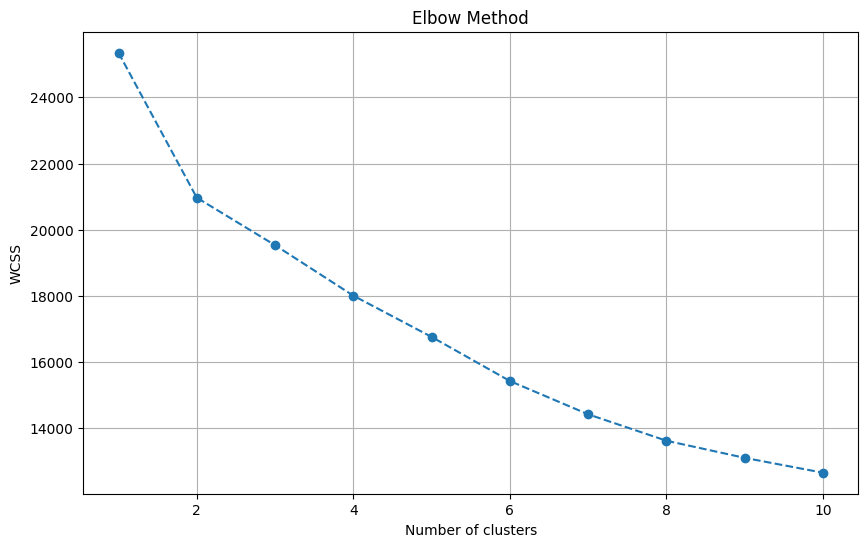

In [ ]:
# plot the  number of cluster k and wcss to determine the k value theough plot
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# it is difficult to locate the number cluster k with above graph
# hence use knee locator to find the number of cluster k value
!pip install kneed
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')


In [ ]:
print(kl.elbow)

4


In [ ]:
# as per the knee locator optimal k  is 4
# so hence optimal k value will be used
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
cluster =kmeans.fit_predict(x_pca)

In [ ]:
df_encoded['cluster'] = cluster

In [ ]:
print(f"\nNumber of data points per cluster for K= 4:")
print(df_encoded['cluster'].value_counts().sort_index())


Number of data points per cluster for K= 4:
cluster
0    179
1    579
2    352
3    343
Name: count, dtype: int64


Culster Analysis

In [ ]:
# Analyze the characteristics of each cluster by looking at the mean of original (or scaled) features.
cluster_means = df_encoded.groupby('cluster')[features_for_clustering].mean()
print("\nMean values of features per cluster:")
print(cluster_means)


Mean values of features per cluster:
            yummy  convenient     spicy  fattening    greasy      fast  \
cluster                                                                  
0        0.022346    0.424581  0.100559   0.927374  0.798883  0.709497   
1        0.860104    0.982729  0.082902   0.789292  0.348877  0.963731   
2        0.789773    0.965909  0.116477   0.900568  0.582386  0.852273   
3        0.067055    0.973761  0.084548   0.932945  0.626822  0.941691   

            cheap     tasty  expensive   healthy  disgusting      Like  \
cluster                                                                  
0        0.424581  0.106145   0.541899  0.050279    0.821229 -3.966480   
1        0.934370  0.953368   0.015544  0.321244    0.032815  2.782383   
2        0.096591  0.838068   0.906250  0.201705    0.122159  2.181818   
3        0.638484  0.204082   0.276968  0.067055    0.419825 -1.574344   

               Age  VisitFrequency_More than once a week  \
cluster     

In [ ]:
pca.explained_variance_

array([4.03562599, 1.87968962, 1.59771361, 1.33639197, 1.24602048,
       1.11994714, 1.06516656, 0.98573103, 0.92852301, 0.82705115,
       0.71822076, 0.62756719, 0.56453496, 0.52623472])

In [ ]:
 #Not directly possible for individual features after PCA and mixing, but we can look at original feature means.


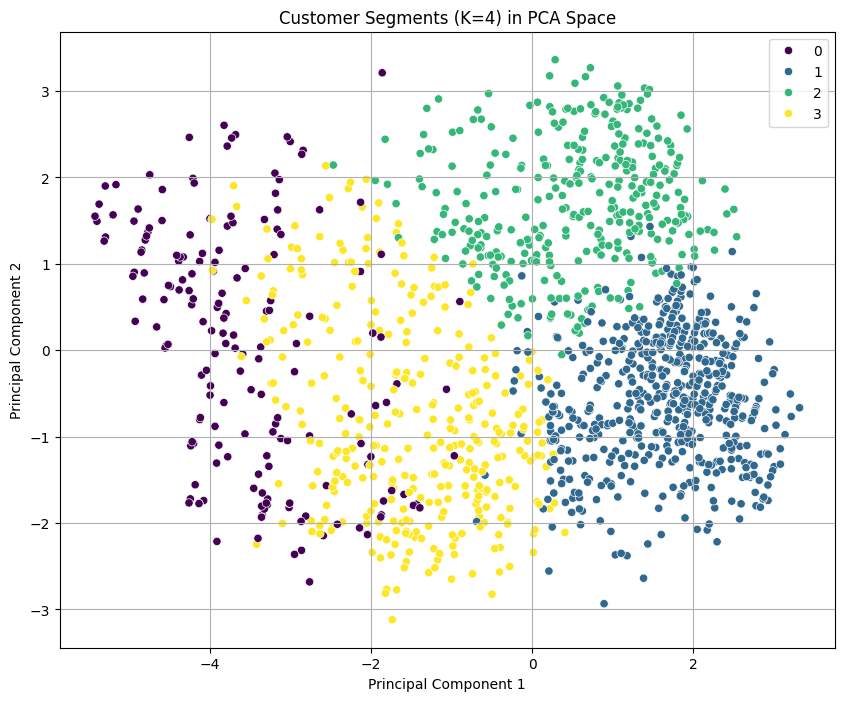

In [ ]:
# Visualize clusters in a 2D PCA plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=cluster, palette='viridis', legend='full')
plt.title(f'Customer Segments (K={4}) in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



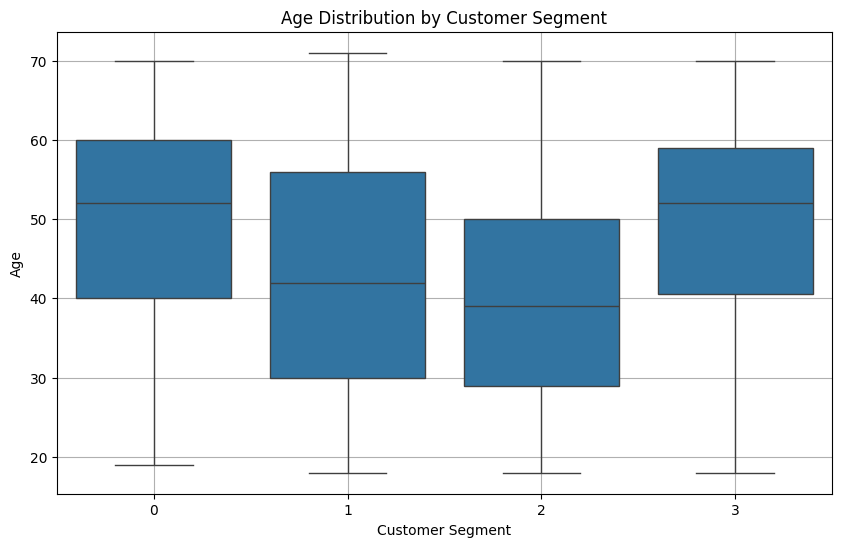

In [ ]:
#selecting the optimal segement
# boxplot age and number of segement
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='Age', data=df_encoded)
plt.title('Age Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Age')
plt.grid(True)
plt.show()